## TOUR AND TRAVEL CUSTOMER CHURN PREDICTION

The Tour & Travels Customer Churn Prediction dataset assists a travel company in
predicting customer churn. It includes indicators such as age, frequent flyer status,
annual income class, services opted frequency, social media account
synchronization, and hotel bookings.

The goal is to build predictive models to save company resources. The dataset,
used for practice and in a hackathon, is freely available. Analysts can perform
exploratory data analyses to reveal insights for effective churn prediction. The
binary target variable distinguishes customers who churn (1) from those who don't
(0), guiding the modeling process.

In [189]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Importing all the necessary libraries

import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Library for modelling
import statsmodels.api as sm

# Library for train test split
from sklearn.model_selection import train_test_split

# Library for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

# Library for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Library for Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Library for analyzing the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [191]:
#Reading the dataset

df = pd.read_csv('Customertravel.csv')

#Checking the first 5 rows of the data set
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [192]:
#Determining the shape of the datset
df.shape

(954, 7)

**Observations**: Dataset has 954 rows and 7 columns.

In [193]:
#Inspecting the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


**Observations**: There are no null values in the dataframe.

In [194]:
#Checking for count of missing values in each column
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

#### Checking For Outiers in Numeric Variables

In [195]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[10,10])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

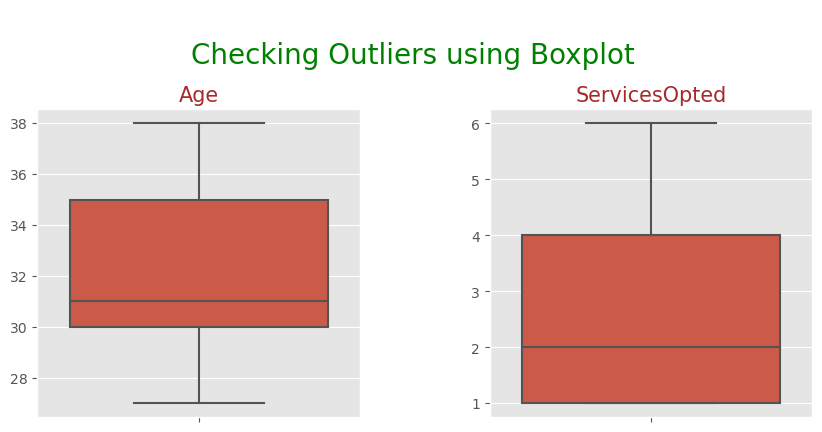

In [196]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["Age","ServicesOpted"]

# Calling the function
Check_Outliers(df,num_cols)

**Observations**: There are no outliers in the data.

### EDA

#### 'Target' column:

In [197]:
#checking the value count in the column

round(df.Target.value_counts(normalize = True)*100,2)

0    76.52
1    23.48
Name: Target, dtype: float64

**Observations**: It seems that only **23.48%** of the customers are churned. The churn Rate is very low.

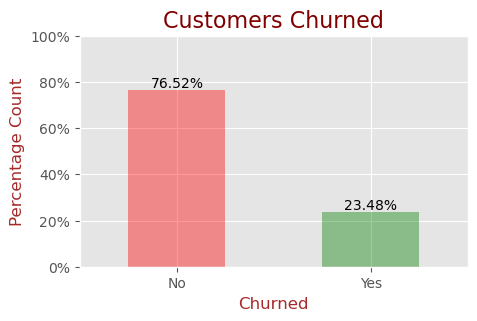

In [198]:
#Plotting the result on barplot

plt.figure(figsize = [5,3])
plt.style.use('ggplot')

ax=(100*df["Target"].value_counts(normalize=True)).plot.bar(color=["Red","Green"],alpha=0.4)

#Adding the title
plt.title("Customers Churned",fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})

# Labeling Axes
plt.xlabel('Churned', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

**Observations**: 
- Majority of the customers have not churned which is **76.52%** of the total customers. 
- The Tour and Travel Company definitely needs to upgrade its policies for attracting the customers.

We shall create a function to plot the count plot for Categorical Variables.

In [199]:
#creating a function for plotting the countplot for Categorical Variables

def countplot(i):
    plt.figure(figsize = [10,4])
    plt.style.use('ggplot')

    ax = sns.countplot(data = df, x = i, hue = 'Target')
    total=len(df[i])
    
    plt.xticks()


    #Adding the title
    plt.title("Countplot of {}".format(i), fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    

    plt.show()


#### 'Age' column:

In [200]:
#checking the value count in the column

df.Age.value_counts()

30    236
37    126
34    107
31    103
28     71
29     70
36     67
27     62
35     52
38     31
33     29
Name: Age, dtype: int64

**Observations**: 
- The customers' age are between 27 years to 38 years.
- Customer aged above 30 years tend to travel through tours and travel company.

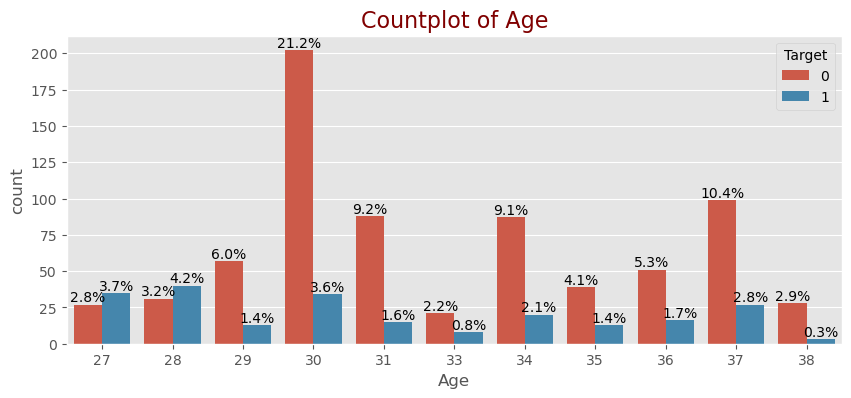

In [201]:
#Plotting the countplot for 'Age'

countplot('Age')

**Observations**: Customers aged 30 years tend to travel more and they can be primary customers.

#### 'FrequentFlyer' column:

In [202]:
#checking the value count in the column

df.FrequentFlyer.value_counts()

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64

We shall impute the value 'No Record' with 'No' for better analysis.

In [203]:
df.FrequentFlyer = df.FrequentFlyer.replace('No Record','No')

In [204]:
#Checking the value counts
df.FrequentFlyer.value_counts()

No     668
Yes    286
Name: FrequentFlyer, dtype: int64

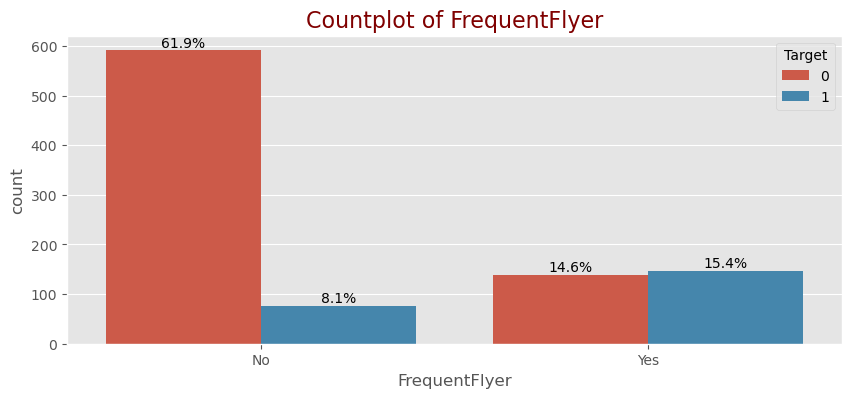

In [205]:
#Plotting the countplot for 'FrequentFlyer'

countplot('FrequentFlyer')

**Observations**:
- Maximum customers do not fly frequently, hence they tend not to churn. 
- The customers who are frequent flyers tend to churn more. 
- **15.4%** of the customers who are frequent flyers are getting churned.

#### 'AnnualIncomeClass' column:

In [206]:
#checking the value count in the column

df.AnnualIncomeClass.value_counts()

Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

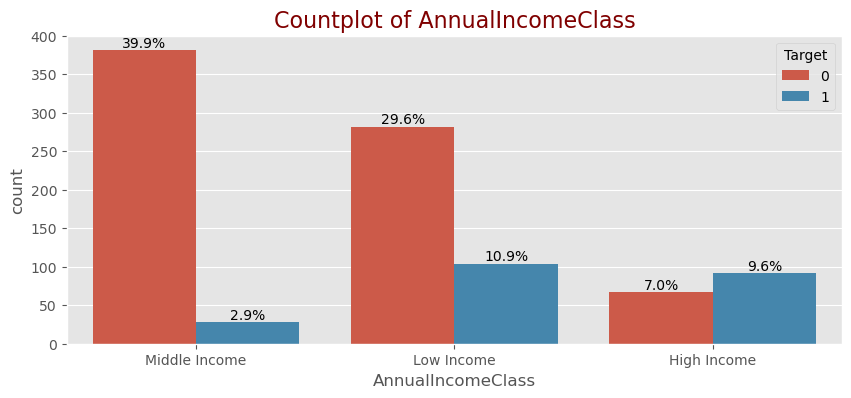

In [207]:
#Plotting the countplot for 'AnnualIncomeClass'

countplot('AnnualIncomeClass')

**Observations**: 
- Majority of the customers who travel belong to Middle Income class who tend to churn the least compared to other classes of income. 
- The company should focus on customers with High income as they have higher chances of taking the services.


#### 'ServicesOpted' column:

In [208]:
#checking the value count in the column

df.ServicesOpted.value_counts()

1    404
2    176
3    124
4    117
5     69
6     64
Name: ServicesOpted, dtype: int64

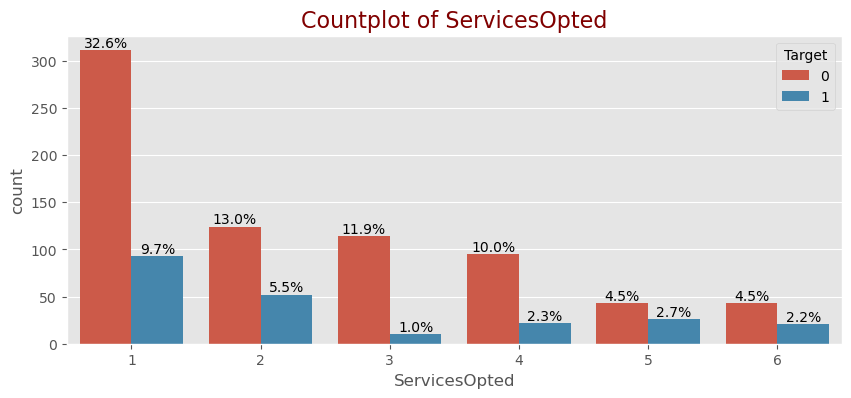

In [209]:
#Plotting the countplot for 'ServicesOpted'

countplot('ServicesOpted')

**Observations**: 
- **42.3%** of the customers have opted only for 1 service from the company in recent time. And those customers also have high chances of churning.
- Very few customers opted for 6 services recently.

#### 'AccountSyncedToSocialMedia' column:

In [210]:
#checking the value count in the column

df.AccountSyncedToSocialMedia.value_counts()

No     594
Yes    360
Name: AccountSyncedToSocialMedia, dtype: int64

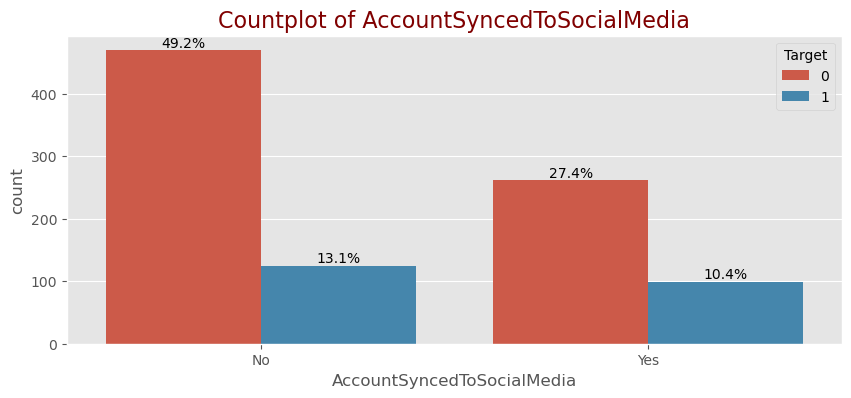

In [211]:
#Plotting the countplot for 'AccountSyncedToSocialMedia'

countplot('AccountSyncedToSocialMedia')

**Observations**: 
- The company should encourage the customers whose social media account is not synced to the company account to sync it so that the company can use it as a marketing strategy.
- Only **37.8%** of the customers have their social media account synced.

#### 'BookedHotelOrNot' column:

In [212]:
#checking the value count in the column

df.BookedHotelOrNot.value_counts()

No     576
Yes    378
Name: BookedHotelOrNot, dtype: int64

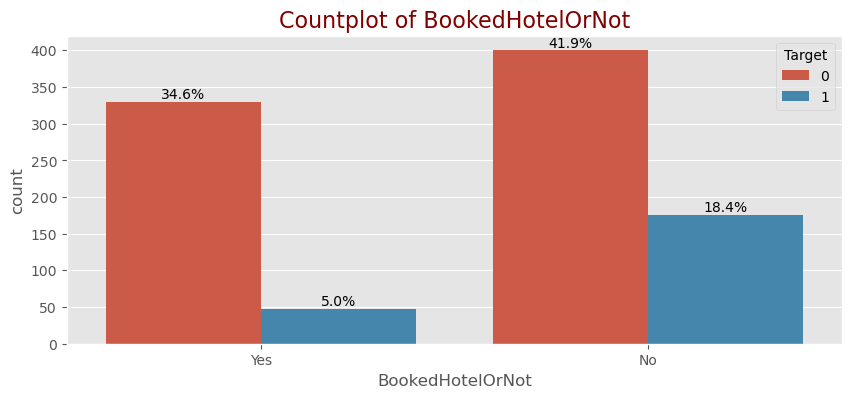

In [213]:
#Plotting the countplot for 'BookedHotelOrNot'

countplot('BookedHotelOrNot')

**Observations**: 
- Majority of the customers who have not booked the hotel through the travel company have high churning probability as compared to customers who have booked the hotel using the services provided by the company.


### Data Preparation

#### Converting binary variables (Yes/No) to 0/1

In [214]:
#creatig a list of variables to be converted
var = ['FrequentFlyer','AccountSyncedToSocialMedia','BookedHotelOrNot']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

df[var] = df[var].apply(binary_map)

df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,Middle Income,6,0,1,0
1,34,1,Low Income,5,1,0,1
2,37,0,Middle Income,3,1,0,0
3,30,0,Middle Income,2,0,0,0
4,30,0,Low Income,1,0,0,0


<Figure size 1600x600 with 0 Axes>

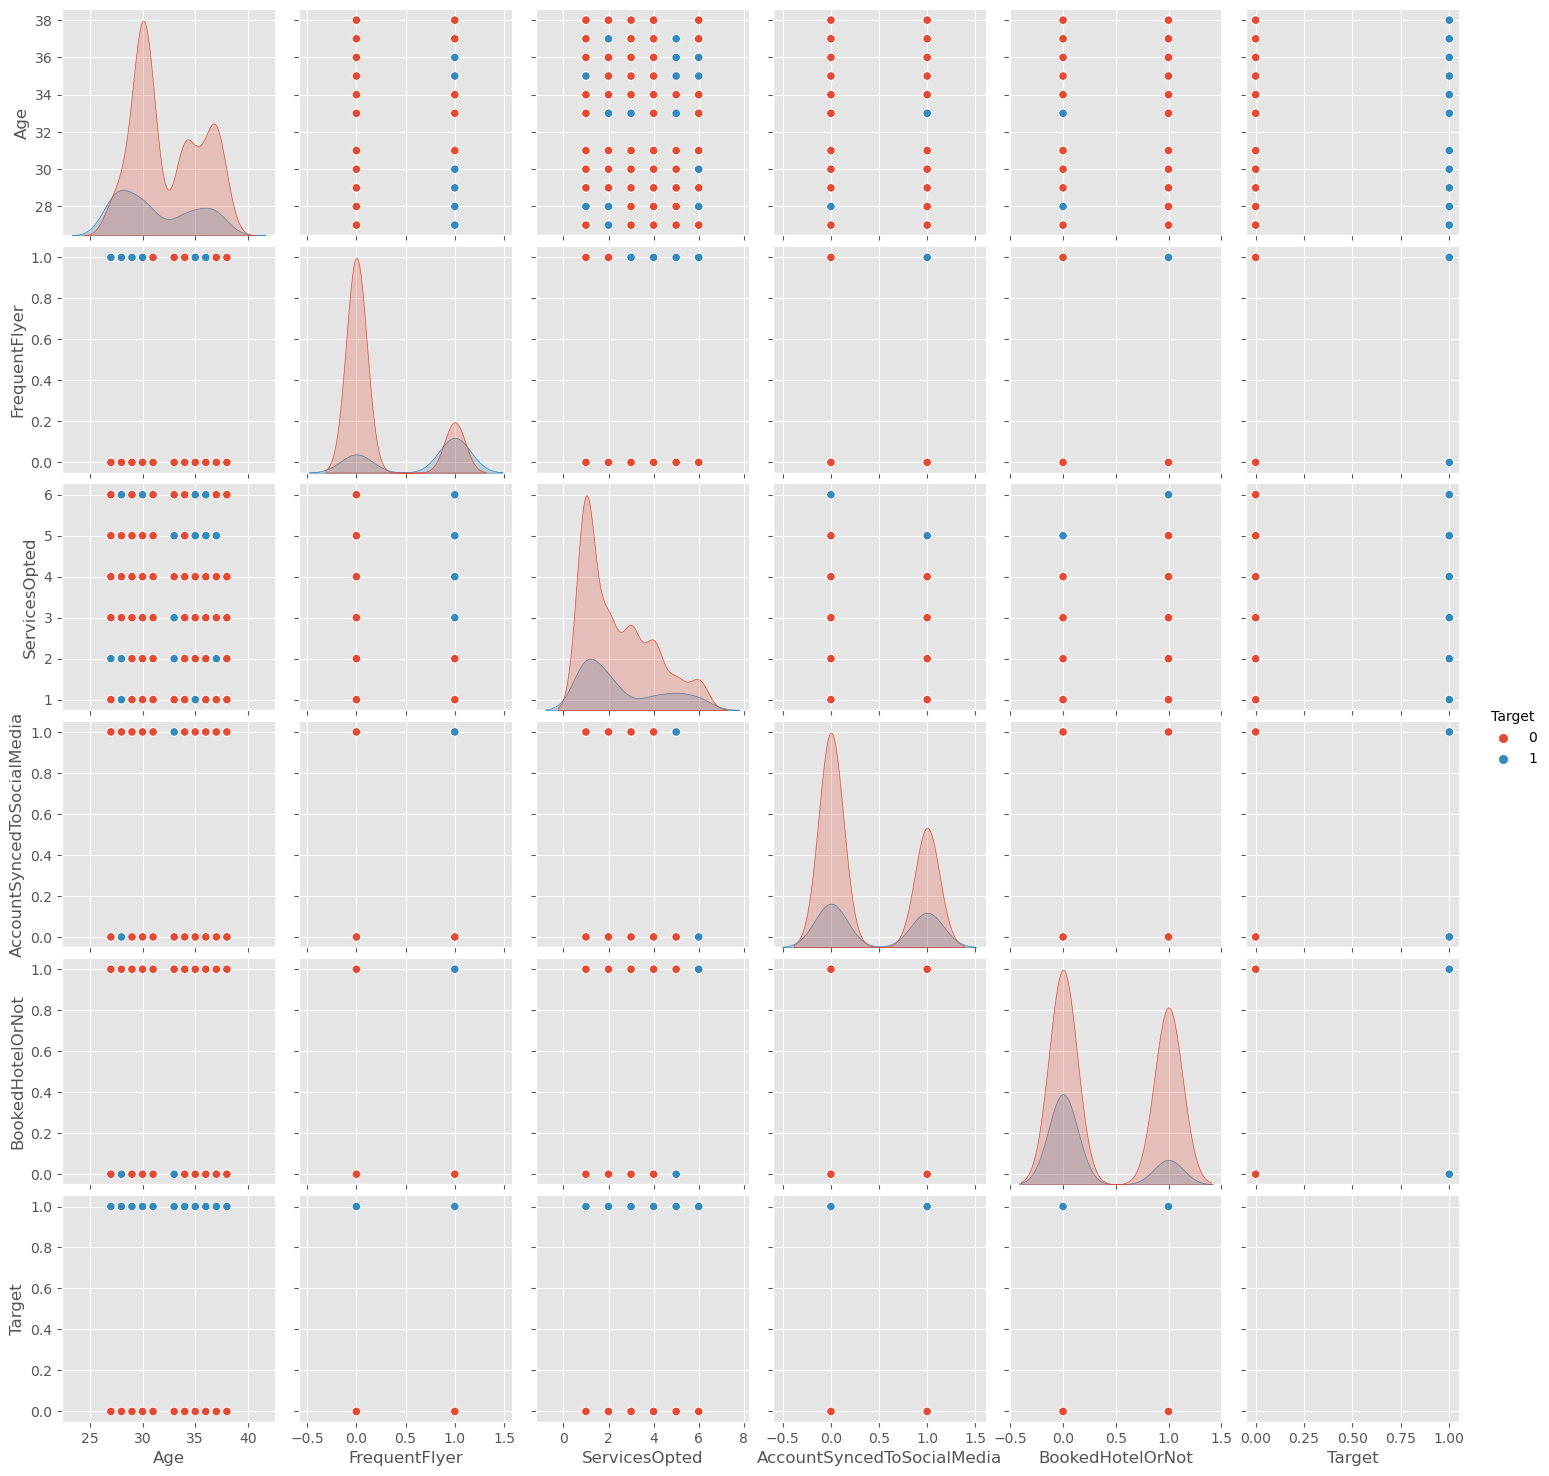

In [215]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 6))
sns.pairplot(data=df,vars=num_cols,hue="Target")                                  
plt.show()

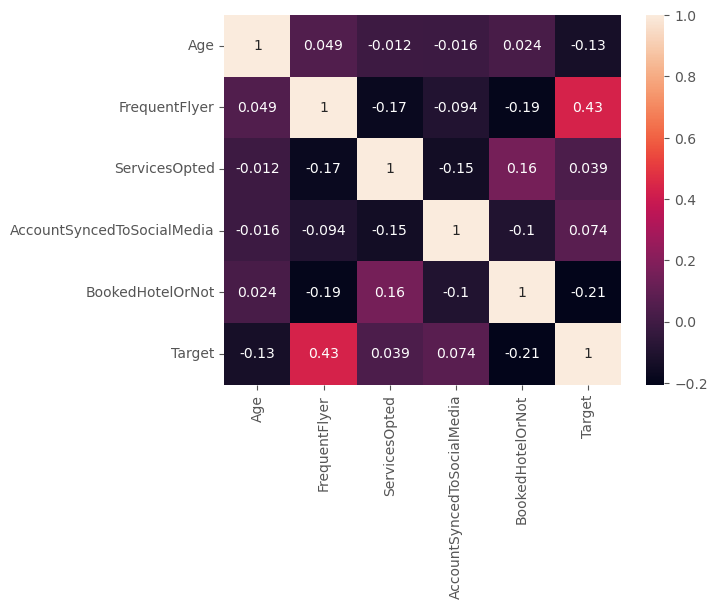

In [216]:
#Heatmap to show the correlation between the numeric variables

sns.heatmap(data=df[num_cols].corr(),annot=True)
plt.show()

**Observations**:
- Target and FrequentFlyer have a postive correlation.

#### For categorical variables with multiple levels, we will create dummy variables:

In [217]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['AnnualIncomeClass']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [218]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,0,Middle Income,6,0,1,0,0,1
1,34,1,Low Income,5,1,0,1,1,0
2,37,0,Middle Income,3,1,0,0,0,1
3,30,0,Middle Income,2,0,0,0,0,1
4,30,0,Low Income,1,0,0,0,1,0


In [219]:
# We shall drop the AAnnualIncomeClass column

df.drop('AnnualIncomeClass',axis = 1, inplace = True)
df.head()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,0,6,0,1,0,0,1
1,34,1,5,1,0,1,1,0
2,37,0,3,1,0,0,0,1
3,30,0,2,0,0,0,0,1
4,30,0,1,0,0,0,1,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int64
 1   FrequentFlyer                    954 non-null    int64
 2   ServicesOpted                    954 non-null    int64
 3   AccountSyncedToSocialMedia       954 non-null    int64
 4   BookedHotelOrNot                 954 non-null    int64
 5   Target                           954 non-null    int64
 6   AnnualIncomeClass_Low Income     954 non-null    uint8
 7   AnnualIncomeClass_Middle Income  954 non-null    uint8
dtypes: int64(6), uint8(2)
memory usage: 46.7 KB


**Observations:** We have 954 rows and 8 columns.

#### Now our data is ready for the model building. 

### Train Test Split

In [221]:
# Putting predictor variables to X
X = df.drop(['Target'], axis=1)

# Putting Target variables to y
y = df["Target"]


In [222]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [223]:
#shape of test and test data sets after split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(667, 7)
(287, 7)
(667,)
(287,)


#### Feature Scaling

Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation. 

In [224]:
scaler=StandardScaler()

#creating a list of numeric variables
num_cols = ['Age','ServicesOpted']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# X-train dataframe after standard scaling
X_train.head()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
105,-0.651985,1,2.202621,0,1,0,0
953,-0.351865,1,-0.867058,0,0,0,0
299,-0.952106,0,-0.253122,0,0,0,1
69,0.548496,1,0.974750,0,0,0,0
85,-1.552346,1,-0.867058,0,1,1,0


In [225]:
#Checking the Churn Rate
churn = (sum(df['Target'])/len(df['Target'].index))*100
churn

23.48008385744235

#### We have almost 23.5% churn rate.

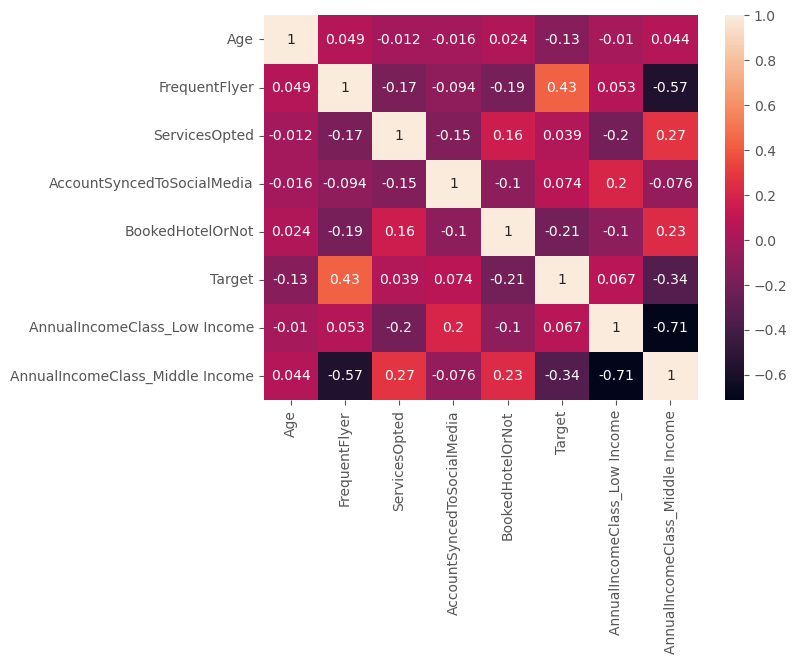

In [226]:
# Let's see the correlation matrix 
plt.figure(figsize = (7,5))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

**Observations:** Target variable is positively correlated to many features.

### Model Building

- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

#### We will be checking VIF again and again so we shall create a function for checking.

In [227]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1: Using all the variables

In [228]:
# Logistic regression model

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train)

# Create a fitted model
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                  667
Model:                            GLM   Df Residuals:                      659
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.03
Date:                Tue, 26 Mar 2024   Deviance:                       546.06
Time:                        12:58:36   Pearson chi2:                     642.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2593
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3776      0.384     -3.590      0.000      -2.130      -0.625
Age                                -0.4422      0.116     -3.820      0.000      -0.669      -0.215
FrequentFlyer                       1.8773      0.322      5.828      0.000       1.246       2.509
ServicesOpted                       0.5669      0.118      4.806      0.000       0.336       0.798
AccountSyncedToSocialMedia          0.6741      0.237      2.839      0.005       0.209       1.140
BookedHotelOrNot                   -0.6566      0.250     -2.627      0.009      -1.147      -0.167
AnnualIncomeClass_Low Income       -0.3908      0.313     -1.247      0.212      -1.005       0.223
AnnualIncomeClass_Middle Income    -1.5623      0.453     -3.447      0.001      -2.451      -0.674
===================================================================================================
"""

Since the number of features is very less. We shall not use RFE method and avoid it. Thus we shall do only Manual Fine Tuning.

In [229]:
# Calculating the VIF for the first model

calculateVIF(X_train)

,Features,VIF
6,AnnualIncomeClass_Middle Income,1.88
5,AnnualIncomeClass_Low Income,1.85
4,BookedHotelOrNot,1.80
3,AccountSyncedToSocialMedia,1.79
1,FrequentFlyer,1.22
2,ServicesOpted,1.14
0,Age,1.01


**Observations:** AnnualIncomeClass_Low Income has high p-value of 0.212 which is greater than the treshold of 0.05. We shall drop this feature.

In [230]:
col = X_train.columns

# Dropping the column
col = col.drop('AnnualIncomeClass_Low Income',1)
col

Index(['Age', 'FrequentFlyer', 'ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'AnnualIncomeClass_Middle Income'],
      dtype='object')

### Model 2:

In [231]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train[col])

# Create a fitted model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                  667
Model:                            GLM   Df Residuals:                      660
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.81
Date:                Tue, 26 Mar 2024   Deviance:                       547.63
Time:                        12:58:36   Pearson chi2:                     635.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2576
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.7255      0.264     -6.528      0.000      -2.244      -1.207
Age                                -0.4599      0.115     -3.997      0.000      -0.685      -0.234
FrequentFlyer                       2.0915      0.274      7.643      0.000       1.555       2.628
ServicesOpted                       0.5637      0.117      4.806      0.000       0.334       0.794
AccountSyncedToSocialMedia          0.6071      0.230      2.634      0.008       0.155       1.059
BookedHotelOrNot                   -0.6919      0.248     -2.792      0.005      -1.177      -0.206
AnnualIncomeClass_Middle Income    -1.1742      0.329     -3.567      0.000      -1.819      -0.529
===================================================================================================
"""

In [232]:
# Calculating the VIF for the second model

calculateVIF(X_train[col])

,Features,VIF
5,AnnualIncomeClass_Middle Income,1.63
4,BookedHotelOrNot,1.54
3,AccountSyncedToSocialMedia,1.33
1,FrequentFlyer,1.18
2,ServicesOpted,1.13
0,Age,1.01


**Observations:**
- Model 2 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis. 
- Also, all VIF are less than 5. No more variable needs to be dropped.


### Model Evaluation
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [233]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)           # giving prob. of getting 1

y_train_pred[:10]

105    0.771289
953    0.509780
299    0.068850
69     0.659977
85     0.474876
845    0.374095
161    0.312364
420    0.046691
370    0.180485
459    0.023921
dtype: float64

In [234]:
# converting to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77128867, 0.50978017, 0.0688504 , 0.65997678, 0.47487638,
       0.37409511, 0.31236352, 0.04669076, 0.18048497, 0.02392127])

In [235]:
# Creating a dataframe with the actual Target flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Targeted':y_train.values, 'Targeted_Prob':y_train_pred})
y_train_pred_final.head()

# y_train.values actual Targeted values from df dataset
# y_train_pred probability of Targeted values predicted by model

,Targeted,Targeted_Prob
0,1,0.771289
1,0,0.509780
2,0,0.068850
3,1,0.659977
4,1,0.474876


**NOTE:** Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

##### Creating new column 'Predicted' with 1 if Targeted_Prob > 0.5 else 0

In [236]:
y_train_pred_final['Predicted'] = y_train_pred_final.Targeted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Targeted,Targeted_Prob,Predicted
0,1,0.771289,1
1,0,0.509780,1
2,0,0.068850,0
3,1,0.659977,1
4,1,0.474876,0


### Calculating all the metrics:
- Confusion Matrix
- Accuracy
- Sensitivity
- Specificity
- Precision
- Recall

In [237]:
#function for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [238]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Targeted'], y_train_pred_final['Predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[452  50]
 [ 88  77]] 

************************************************** 

True Negative                    :  452
True Positive                    :  77
False Negative                   :  88
False Positve                    :  50
Model Accuracy                   :  0.7931
Model Sensitivity                :  0.4667
Model Specificity                :  0.9004
Model Precision                  :  0.6063
Model Recall                     :  0.4667
Model True Positive Rate (TPR)   :  0.4667
Model False Positive Rate (FPR)  :  0.0996


************************************************** 



###  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [239]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [240]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Targeted, y_train_pred_final.Targeted_Prob, drop_intermediate = False )

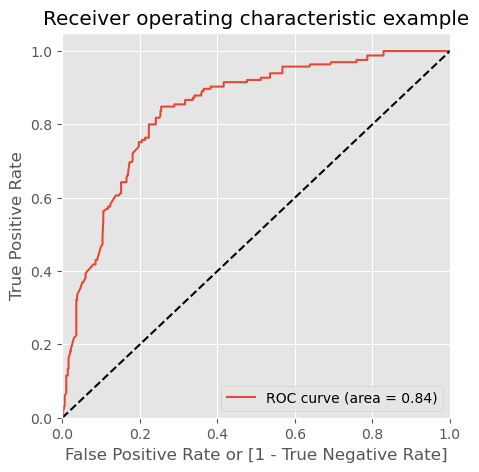

In [241]:
draw_roc(y_train_pred_final.Targeted, y_train_pred_final.Targeted_Prob)

**Observations:** The ROC Curve should be a value close to 1. We are getting a good value of 0.84 indicating a good predictive model.

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [242]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Targeted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Targeted,Targeted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.771289,1,1,1,1,1,1,1,1,1,0,0
1,0,0.509780,1,1,1,1,1,1,1,0,0,0,0
2,0,0.068850,0,1,0,0,0,0,0,0,0,0,0
3,1,0.659977,1,1,1,1,1,1,1,1,0,0,0
4,1,0.474876,0,1,1,1,1,1,0,0,0,0,0


In [243]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Targeted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.247376  1.000000  0.000000
0.1   0.1  0.595202  0.927273  0.486056
0.2   0.2  0.746627  0.854545  0.711155
0.3   0.3  0.790105  0.751515  0.802789
0.4   0.4  0.796102  0.606061  0.858566
0.5   0.5  0.793103  0.466667  0.900398
0.6   0.6  0.803598  0.321212  0.962151
0.7   0.7  0.782609  0.181818  0.980080
0.8   0.8  0.766117  0.084848  0.990040
0.9   0.9  0.752624  0.006061  0.998008


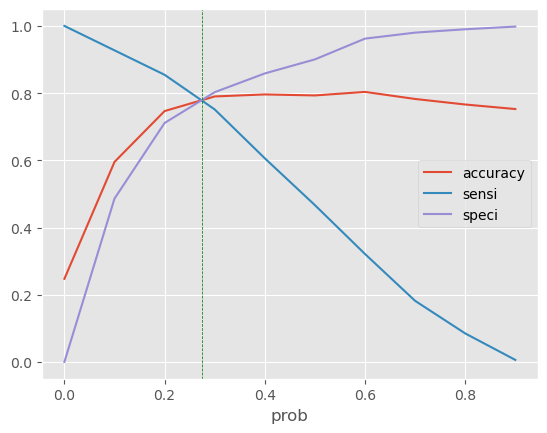

In [244]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.275, color='green',linewidth = 0.55, linestyle='--')
plt.show()

#### From the curve above, 0.275 is the optimum point to take it as a cutoff probability.

In [245]:
y_train_pred_final['Final_predicted'] = y_train_pred_final['Targeted_Prob'].map( lambda x: 1 if x > 0.275 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Targeted,Targeted_Prob,Final_predicted
0,1,0.771289,1
1,0,0.509780,1
2,0,0.068850,0
3,1,0.659977,1
4,1,0.474876,1


In [246]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Targeted'], y_train_pred_final['Final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[390 112]
 [ 34 131]] 

************************************************** 

True Negative                    :  390
True Positive                    :  131
False Negative                   :  34
False Positve                    :  112
Model Accuracy                   :  0.7811
Model Sensitivity                :  0.7939
Model Specificity                :  0.7769
Model Precision                  :  0.5391
Model Recall                     :  0.7939
Model True Positive Rate (TPR)   :  0.7939
Model False Positive Rate (FPR)  :  0.2231


************************************************** 



**Observations:** So as we can see above the model seems to be performing well. The ROC curve has a value of 0.84, which is very good. We have the following values for the Train Data:

Accuracy : 78.11%

Sensitivity : 79.39%

Specificity : 77.69%


### Making Predictions on Test set

In [247]:
#scaling the test set

X_test[num_cols] = scaler.transform(X_test[num_cols])

#selecting those columns which are selected in the final model

X_test = X_test[col]
X_test.head()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,AnnualIncomeClass_Middle Income
697,-1.552346,1,-0.867058,1,0,0
831,-0.952106,0,-0.253122,0,0,1
116,-0.651985,0,0.360814,1,0,1
134,-0.651985,0,0.360814,0,0,0
376,0.548496,0,-0.867058,1,1,0


In [249]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(287, 7)

In [250]:
# making prediction using model 2 (final model)
y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

697    0.768242
831    0.068850
116    0.143156
134    0.227538
376    0.072343
686    0.068018
625    0.578690
500    0.056666
523    0.143146
124    0.068845
dtype: float64

In [251]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
697,0.768242
831,0.068850
116,0.143156
134,0.227538
376,0.072343


In [252]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Target
697,1
831,0
116,0
134,0
376,0


In [253]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Target,0
0,1,0.768242
1,0,0.068850
2,0,0.143156
3,0,0.227538
4,0,0.072343


In [254]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Targeted_Prob', 'Target':'Targeted'})

y_pred_final.head()

,Targeted,Targeted_Prob
0,1,0.768242
1,0,0.068850
2,0,0.143156
3,0,0.227538
4,0,0.072343


In [255]:
# taking sensitivity-specificity method at 0.275 probability cutoff during training
y_pred_final['Final_predicted'] = y_pred_final['Targeted_Prob'].map(lambda x: 1 if x > 0.275 else 0)
y_pred_final.head()

,Targeted,Targeted_Prob,Final_predicted
0,1,0.768242,1
1,0,0.068850,0
2,0,0.143156,0
3,0,0.227538,0
4,0,0.072343,0


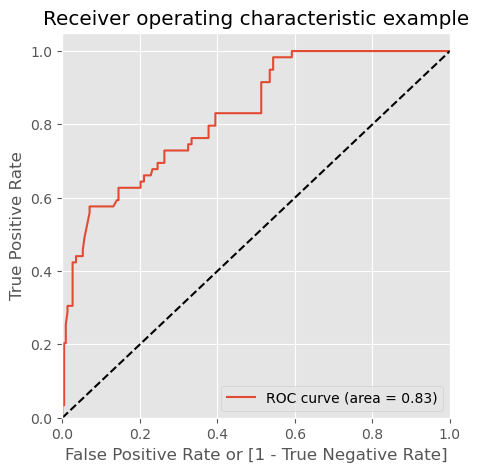

In [256]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Targeted"], y_pred_final["Targeted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Targeted"], y_pred_final["Targeted_Prob"])

**Observations:** Area under ROC curve is 0.83 out of 1 which indicates a good predictive model.

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (Final_predicted) to the actual labels (Targeted) to compute various performance metrics such as accuracy, precision, recall, etc.

#### Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [257]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Targeted'], y_pred_final['Final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[175  53]
 [ 19  40]] 

************************************************** 

True Negative                    :  175
True Positive                    :  40
False Negative                   :  19
False Positve                    :  53
Model Accuracy                   :  0.7491
Model Sensitivity                :  0.678
Model Specificity                :  0.7675
Model Precision                  :  0.4301
Model Recall                     :  0.678
Model True Positive Rate (TPR)   :  0.678
Model False Positive Rate (FPR)  :  0.2325


************************************************** 



**Observations:** So as we can see above the model seems to be performing well. The ROC curve has a value of 0.83, which is very good. We have the following values for the Test Data:

Accuracy : 74.91%

Sensitivity : 67.8%

Specificity : 76.75%


In [259]:
# features and their coefficicent from final model
parameters=res.params.sort_values(ascending=False)
parameters

FrequentFlyer                      2.091544
AccountSyncedToSocialMedia         0.607138
ServicesOpted                      0.563671
Age                               -0.459937
BookedHotelOrNot                  -0.691850
AnnualIncomeClass_Middle Income   -1.174197
const                             -1.725518
dtype: float64

### Model Parameters

The final Logistic Regression Model has 6 features.

#### `Top 3 features` that are contributing `positively` to for helping the company to gain customers are:

- FrequentFlyer                      
- AccountSyncedToSocialMedia         
- ServicesOpted                      

### Recommendations:

- The company should focus on customers whose is between 29 to 36 years as those customers will travel more frequently.
- Customers who have opted for less number of services should be targeted with some discounts and extra services.
- Frequent Flyers customers should be given priority as they are a boost to company's revenue.
- The company should also make some terms mandatory for customers like linking the account of the customer in the company with their social media account as a marketing strategy.
- Customers with low and medium income can be a great source of revenue so company should come up with some strategies to attract those customers.
- High Income customers might be given little extra care as they might travel more than other customers.